# Neural network

Axel Wieslander jansson

* Analyze the data
* Remove or modify the data so that it can be used in the model
* Train at least 5 different neural network and compare the runtime

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

Importing the datasets

In [2]:
churn_test =pd.read_csv('../../Datasets/churn_test.csv')
churn_train =pd.read_csv('../../Datasets/churn_train.csv')

## Test dataset

In [3]:
churn_test.shape

(1409, 21)

In [4]:
churn_test.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9505-SQFSW,Female,0,Yes,Yes,3,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,40.30,92.5,No
1,1723-HKXJQ,Male,0,No,No,42,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.75,4273.45,Yes
2,9154-QDGTH,Male,0,Yes,Yes,43,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),104.30,4451.85,No
3,8309-IEYJD,Female,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.60,70.6,No
4,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes


Looking for missing values

In [5]:
churn_test.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Check for duplicates

In [6]:
churn_test.duplicated().sum()

0

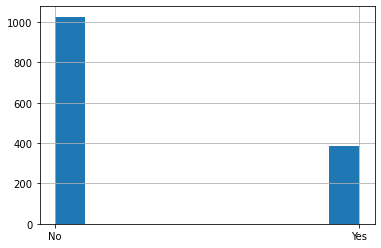

In [7]:
y_test = churn_test['Churn']
y_test.hist();

## Checking if there are any entries that does not match the given information about attribute values

In [5]:
attributes_test = list(churn_test)
to_be_removed = ['customerID', 'tenure', 'TotalCharges', 'MonthlyCharges']
for i in to_be_removed:
    attributes_test.remove(i)

for attribute in attributes_test:
    unique_vals = churn_test[attribute].unique()
    print(f"{attribute} takes the values of {unique_vals} in the testdataset")
    

gender takes the values of ['Female' 'Male'] in the testdataset
SeniorCitizen takes the values of [0 1] in the testdataset
Partner takes the values of ['Yes' 'No'] in the testdataset
Dependents takes the values of ['Yes' 'No'] in the testdataset
PhoneService takes the values of ['No' 'Yes'] in the testdataset
MultipleLines takes the values of ['No phone service' 'Yes' 'No'] in the testdataset
InternetService takes the values of ['DSL' 'Fiber optic' 'No'] in the testdataset
OnlineSecurity takes the values of ['No' 'Yes' 'No internet service'] in the testdataset
OnlineBackup takes the values of ['Yes' 'No' 'No internet service'] in the testdataset
DeviceProtection takes the values of ['No' 'Yes' 'No internet service'] in the testdataset
TechSupport takes the values of ['No' 'Yes' 'No internet service'] in the testdataset
StreamingTV takes the values of ['No' 'Yes' 'No internet service'] in the testdataset
StreamingMovies takes the values of ['Yes' 'No' 'No internet service'] in the testd

# If Internet service = 'No' then OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies HAS to be marked as 'No internet service'



None of these are wrongly classified!

In [6]:
internet_dependant = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for dependant_attribute in internet_dependant:
    print(churn_test[(churn_test['InternetService'] == 'No') & (churn_test[dependant_attribute] != 'No internet service')])
    

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0

# Train data


In [10]:
churn_train.shape

(5634, 21)

In [11]:
churn_train.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1768-ZAIFU,Female,1,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.20,25.2,Yes
1,2159-TURXX,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.05,95.55,No
2,8261-GWDBQ,Female,1,Yes,No,60,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.05,6925.9,No
3,2732-ISEZX,Female,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.50,104.3,No
4,7607-QKKTJ,Male,0,Yes,Yes,45,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,One year,Yes,Credit card (automatic),95.00,4368.85,No


In [12]:
churn_train.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
churn_train.duplicated().sum()

0

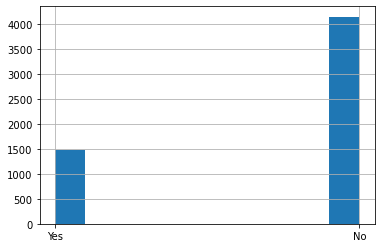

In [14]:
y_train = churn_train['Churn']
y_train.hist();

In [7]:
attributes_train = list(churn_train)
to_be_removed = ['customerID', 'tenure', 'TotalCharges', 'MonthlyCharges']
for i in to_be_removed:
    attributes_train.remove(i)

for attribute in attributes_test:
    unique_vals = churn_train[attribute].unique()
    print(f"{attribute} takes the values of {unique_vals}")

gender takes the values of ['Female' 'Male']
SeniorCitizen takes the values of [1 0]
Partner takes the values of ['No' 'Yes']
Dependents takes the values of ['No' 'Yes']
PhoneService takes the values of ['No' 'Yes']
MultipleLines takes the values of ['No phone service' 'No' 'Yes']
InternetService takes the values of ['DSL' 'No' 'Fiber optic']
OnlineSecurity takes the values of ['No' 'No internet service' 'Yes']
OnlineBackup takes the values of ['No' 'No internet service' 'Yes']
DeviceProtection takes the values of ['No' 'No internet service' 'Yes']
TechSupport takes the values of ['No' 'No internet service' 'Yes']
StreamingTV takes the values of ['No' 'No internet service' 'Yes']
StreamingMovies takes the values of ['No' 'No internet service' 'Yes']
Contract takes the values of ['Month-to-month' 'Two year' 'One year']
PaperlessBilling takes the values of ['Yes' 'No']
PaymentMethod takes the values of ['Electronic check' 'Credit card (automatic)' 'Bank transfer (automatic)'
 'Mailed che

None of these are wrongly classified!

In [8]:
internet_dependant = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for dependant_attribute in internet_dependant:
    print(churn_train[(churn_train['InternetService'] == 'No') & (churn_train[dependant_attribute] != 'No internet service')])
    

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0

# Preparing the datasets

In [40]:
y_test = churn_test['Churn']

In [41]:
y_train = churn_train['Churn']

# Starting off by using all attributes except 'CustomerID'

In [9]:
X_test = churn_test.drop(columns = ['customerID', 'Churn'])

In [20]:
X_test.shape

(1409, 19)

In [10]:
X_train = churn_train.drop(columns = ['customerID', 'Churn'])

In [22]:
X_train.shape

(5634, 19)

## Replacing ' ' empty value with -1 in the train and test dataset

In [11]:
missing_data_train = X_train[X_train['TotalCharges'] == X_train['TotalCharges'].min()].index

In [12]:
for i in missing_data_train:
    X_train.loc[i,['TotalCharges']] = -1

In [13]:
missing_data_test = X_test[X_test['TotalCharges'] == X_test['TotalCharges'].min()].index

In [14]:
for i in missing_data_test:
    X_test.loc[i,['TotalCharges']] = -1

In [15]:
X_train['TotalCharges'] = X_train['TotalCharges'].astype('float64')

In [16]:
X_test['TotalCharges'] = X_test['TotalCharges'].astype('float64')

## Since all maximum/minimum values are located in the training dataset a normalization scaler could be applied, but since the values are not normal distributed they are scaled by standardization instead of normalizaiton

In [31]:
from scipy import stats

<AxesSubplot:>

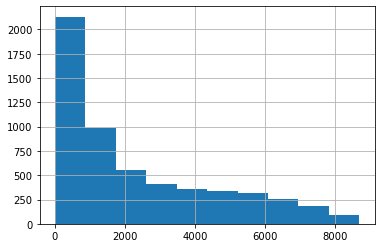

In [29]:
X_train['TotalCharges'].hist()

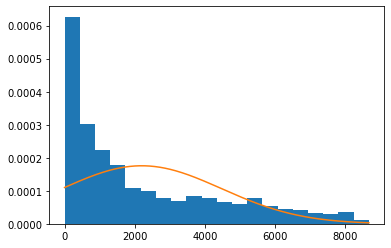

In [32]:
plt.hist(X_test['TotalCharges'], 20, density=True, stacked=True)

mu, sigma = X_test['TotalCharges'].mean(), X_train['TotalCharges'].std()

plt.plot(sorted(X_test['TotalCharges']), stats.norm.pdf(sorted(X_test['TotalCharges']), mu, sigma))

In [33]:
X_train['MonthlyCharges'].std()

30.187463870128916

In [34]:
X_test['MonthlyCharges'].mean()

64.49315117104338

<AxesSubplot:>

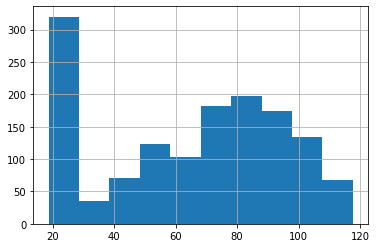

In [35]:
X_test['MonthlyCharges'].hist()

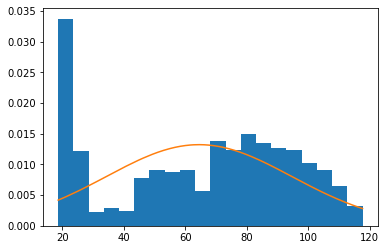

In [36]:
plt.hist(X_test['MonthlyCharges'], 20, density=True, stacked=True)

mu, sigma = X_test['MonthlyCharges'].mean(), X_train['MonthlyCharges'].std()


plt.plot(sorted(X_test['MonthlyCharges']), stats.norm.pdf(sorted(X_test['MonthlyCharges']), mu, sigma))

In [37]:
X_test['tenure'].mean()

31.249112845990062

In [38]:
X_test['tenure'].std()

24.50022555251952

<AxesSubplot:>

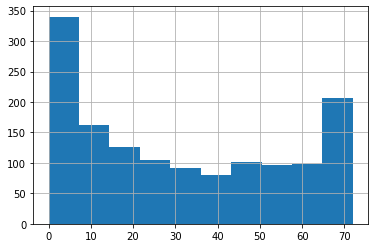

In [39]:
X_test['tenure'].hist()

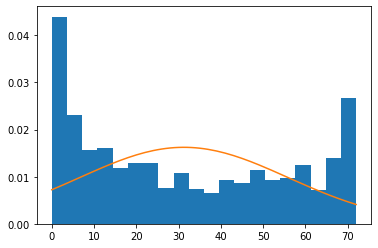

In [40]:
plt.hist(X_test['tenure'], 20, density=True, stacked=True)

mu, sigma = X_test['tenure'].mean(), X_train['tenure'].std()


plt.plot(sorted(X_test['tenure']), stats.norm.pdf(sorted(X_test['tenure']), mu, sigma))

In [41]:
print(f"Total charge max value in test: {X_test['TotalCharges'].max()}, in train: {X_train['TotalCharges'].max()}")
print(f"Monthly charge max value in test: {X_test['MonthlyCharges'].max()}, in train: {X_train['MonthlyCharges'].max()}")
print(f"tenure max value in test: {X_test['tenure'].max()}, in train: {X_train['tenure'].max()}")

Total charge max value in test: 8670.1, in train: 8684.8
Monthly charge max value in test: 117.6, in train: 118.75
tenure max value in test: 72, in train: 72


In [42]:
print(f"Total charge min value in test: {X_test['TotalCharges'].min()}, in train: {X_train['TotalCharges'].min()}")
print(f"Monthly charge min value in test: {X_test['MonthlyCharges'].min()}, in train: {X_train['MonthlyCharges'].min()}")
print(f"tenure min value in test: {X_test['tenure'].min()}, in train: {X_train['tenure'].min()}")

Total charge min value in test: -1.0, in train: -1.0
Monthly charge min value in test: 18.7, in train: 18.25
tenure min value in test: 0, in train: 0


## Using OneHotEncoder to convert the categorical data.

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
OHE_enc = OneHotEncoder()

## Getting the features that will be used in the OHE

In [19]:
churn_features = X_train.columns

churn_features_OHE = churn_features.drop(["TotalCharges","MonthlyCharges","tenure"])

In [20]:
X_train_OHE = X_train.drop(columns=["TotalCharges","MonthlyCharges","tenure"])


In [21]:
X_test_OHE = X_test.drop(columns=["TotalCharges","MonthlyCharges","tenure"])

## Encoding the fit function to the training data.

In [22]:
OHE_enc.fit(X_train_OHE)

OneHotEncoder()

## Transforming the training data

In [23]:
X_train_OHE = OHE_enc.transform(X_train_OHE)

In [24]:
X_train_OHE_columns = OHE_enc.get_feature_names()
X_train_OHE_df = pd.DataFrame(X_train_OHE.toarray(), columns = X_train_OHE_columns)
X_train_OHE_norm = X_train_OHE_df.copy()
X_train_OHE_df

,x0_Female,x0_Male,x1_0,x1_1,x2_No,x2_Yes,x3_No,x3_Yes,x4_No,x4_Yes,...,x12_Yes,x13_Month-to-month,x13_One year,x13_Two year,x14_No,x14_Yes,x15_Bank transfer (automatic),x15_Credit card (automatic),x15_Electronic check,x15_Mailed check
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5630,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
5631,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5632,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Transforming the test data

In [25]:
X_test_OHE = OHE_enc.transform(X_test_OHE)

In [26]:
X_test_OHE_columns = OHE_enc.get_feature_names()
X_test_OHE_df = pd.DataFrame(X_test_OHE.toarray(), columns = X_test_OHE_columns)
X_test_OHE_norm = X_test_OHE_df.copy()
X_test_OHE_df

,x0_Female,x0_Male,x1_0,x1_1,x2_No,x2_Yes,x3_No,x3_Yes,x4_No,x4_Yes,...,x12_Yes,x13_Month-to-month,x13_One year,x13_Two year,x14_No,x14_Yes,x15_Bank transfer (automatic),x15_Credit card (automatic),x15_Electronic check,x15_Mailed check
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1405,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1406,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1407,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Rescaling data using standardscaler.

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

## Total charges

In [29]:
#Reshaping data so that it can be transformed
X_train_tot_charges_reshape = X_train['TotalCharges'].values.reshape(-1,1)
X_test_tot_charge_reshape = X_test['TotalCharges'].array.reshape(-1,1)

tot_charges_scaler = scaler.fit(X_train_tot_charges_reshape)

In [30]:
X_train_tot_charges_scaled = tot_charges_scaler.transform(X_train_tot_charges_reshape)
X_test_tot_charge_scaled = tot_charges_scaler.transform(X_test_tot_charge_reshape)
#The data needs to be assigned to 1 column for it to be added to the dataframe
X_train_tot_charges_scaled = X_train_tot_charges_scaled[:,0]
X_test_tot_charge_scaled = X_test_tot_charge_scaled[:,0]
# Adding the array to the dataframe.
X_train_OHE_df['TotalCharges'] = pd.Series(X_train_tot_charges_scaled)
X_test_OHE_df['TotalCharges'] = X_test_tot_charge_scaled.tolist()
X_train_OHE_df

,x0_Female,x0_Male,x1_0,x1_1,x2_No,x2_Yes,x3_No,x3_Yes,x4_No,x4_Yes,...,x13_Month-to-month,x13_One year,x13_Two year,x14_No,x14_Yes,x15_Bank transfer (automatic),x15_Credit card (automatic),x15_Electronic check,x15_Mailed check,TotalCharges
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.001915
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.970930
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.037446
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.967076
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.911212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.865032
5630,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.941817
5631,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.604680
5632,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.019911


In [31]:
X_test_OHE_df

,x0_Female,x0_Male,x1_0,x1_1,x2_No,x2_Yes,x3_No,x3_Yes,x4_No,x4_Yes,...,x13_Month-to-month,x13_One year,x13_Two year,x14_No,x14_Yes,x15_Bank transfer (automatic),x15_Credit card (automatic),x15_Electronic check,x15_Mailed check,TotalCharges
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.972273
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.869194
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.947769
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.981919
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.835362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.170036
1405,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.014912
1406,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.835692
1407,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.247774


## Monthly charges

In [32]:
X_train_monthly_charges_reshape = X_train['MonthlyCharges'].values.reshape(-1,1)
X_test_monthly_charge_reshape = X_test['MonthlyCharges'].array.reshape(-1,1)
monthly_charges_scaler = scaler.fit(X_train_monthly_charges_reshape)

In [33]:
X_train_monthly_charges_scaled = monthly_charges_scaler.transform(X_train_monthly_charges_reshape)
X_test_monthly_charge_scaled = monthly_charges_scaler.transform(X_test_monthly_charge_reshape)

#The data needs to be assigned to 1 column for it to be added to the dataframe
X_train_monthly_charges_scaled = X_train_monthly_charges_scaled[:,0]
X_test_monthly_charge_scaled = X_test_monthly_charge_scaled[:,0]
# Adding the array to the dataframe.
X_train_OHE_df['MonthlyCharges'] = pd.Series(X_train_monthly_charges_scaled)
X_test_OHE_df['MonthlyCharges'] = pd.Series(X_test_monthly_charge_scaled)
X_train_OHE_df

,x0_Female,x0_Male,x1_0,x1_1,x2_No,x2_Yes,x3_No,x3_Yes,x4_No,x4_Yes,...,x13_One year,x13_Two year,x14_No,x14_Yes,x15_Bank transfer (automatic),x15_Credit card (automatic),x15_Electronic check,x15_Mailed check,TotalCharges,MonthlyCharges
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.001915,-1.312875
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.970930,-1.483491
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.037446,1.696919
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.967076,-1.468583
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.911212,0.999548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.865032,-0.159976
5630,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.941817,-1.456987
5631,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.604680,-1.486804
5632,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.019911,-0.002612


In [34]:
X_test_OHE_df

,x0_Female,x0_Male,x1_0,x1_1,x2_No,x2_Yes,x3_No,x3_Yes,x4_No,x4_Yes,...,x13_One year,x13_Two year,x14_No,x14_Yes,x15_Bank transfer (automatic),x15_Credit card (automatic),x15_Electronic check,x15_Mailed check,TotalCharges,MonthlyCharges
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.972273,-0.812623
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.869194,1.223171
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.947769,1.307650
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.981919,0.191194
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.835362,-0.683419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.170036,1.347406
1405,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.014912,-0.461453
1406,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.835692,-0.638694
1407,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.247774,0.467823


## tenure

In [35]:
X_train_tenure_reshape = X_train['tenure'].values.reshape(-1,1)
X_test_tenure_reshape = X_test['tenure'].values.reshape(-1,1)
tenure_scaler = scaler.fit(X_train_tenure_reshape)

In [36]:
X_train_tenure_scaled = tenure_scaler.transform(X_train_tenure_reshape)
X_test_tenure_scaled = tenure_scaler.transform(X_test_tenure_reshape)
#The data needs to be assigned to 1 column for it to be added to the dataframe
X_train_tenure_scaled = X_train_tenure_scaled[:,0]
X_test_tenure_scaled = X_test_tenure_scaled[:,0]
X_test_tenure_scaled = X_test_tenure_scaled.tolist()
# Adding the array to the dataframe.

X_train_OHE_df['tenure'] = pd.Series(X_train_tenure_scaled)
X_test_OHE_df['tenure'] = X_test_tenure_scaled
X_train_OHE_df

,x0_Female,x0_Male,x1_0,x1_1,x2_No,x2_Yes,x3_No,x3_Yes,x4_No,x4_Yes,...,x13_Two year,x14_No,x14_Yes,x15_Bank transfer (automatic),x15_Credit card (automatic),x15_Electronic check,x15_Mailed check,TotalCharges,MonthlyCharges,tenure
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.001915,-1.312875,-1.288424
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.970930,-1.483491,-1.125599
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.037446,1.696919,1.113244
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.967076,-1.468583,-1.125599
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.911212,0.999548,0.502651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.865032,-0.159976,1.601719
5630,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.941817,-1.456987,-1.003480
5631,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.604680,-1.486804,0.543357
5632,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.019911,-0.002612,0.177001


In [37]:
X_test_OHE_df

,x0_Female,x0_Male,x1_0,x1_1,x2_No,x2_Yes,x3_No,x3_Yes,x4_No,x4_Yes,...,x13_Two year,x14_No,x14_Yes,x15_Bank transfer (automatic),x15_Credit card (automatic),x15_Electronic check,x15_Mailed check,TotalCharges,MonthlyCharges,tenure
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.972273,-0.812623,-1.207012
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.869194,1.223171,0.380532
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.947769,1.307650,0.421238
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.981919,0.191194,-1.288424
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.835362,-0.683419,-0.962774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.170036,1.347406,-0.311474
1405,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.014912,-0.461453,0.502651
1406,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.835692,-0.638694,-0.922068
1407,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.247774,0.467823,0.217707


# Creating the neural networks

In [38]:
from sklearn.neural_network import MLPClassifier

# 4 hidden layers, 5neurons, learning rate: 0.01

Accuracy: 0.7998580553584103
Wall time: 1.96 s


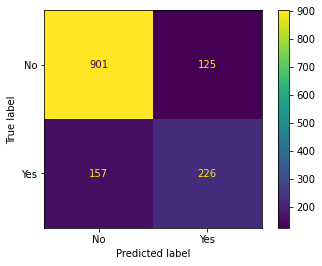

In [42]:
%%time

nn_clf_1 = MLPClassifier(hidden_layer_sizes = (5,5,5,5), learning_rate_init = 0.01, random_state = 0)
nn_clf_1.fit(X_train_OHE_df, y_train)
predictions_1 = nn_clf_1.predict(X_test_OHE_df)
accu1=accuracy_score(y_test, predictions_1)
cm_1 = confusion_matrix(y_test, predictions_1)
print(f"Accuracy: {accu1}")
disp_1 = ConfusionMatrixDisplay(confusion_matrix = cm_1, display_labels = nn_clf_1.classes_)
disp_1.plot();

# 4 hidden layers, 100 neurons, learning rate: 0.01

Accuracy: 0.723207948899929
Wall time: 5.86 s


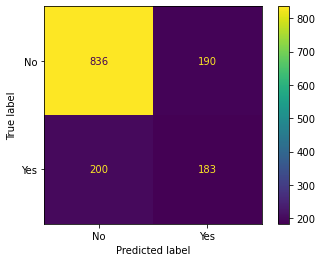

In [43]:
%%time

nn_clf_2 = MLPClassifier(hidden_layer_sizes = (100,100), learning_rate_init = 0.01, random_state = 0)
nn_clf_2.fit(X_train_OHE_df, y_train)
predictions_2 = nn_clf_2.predict(X_test_OHE_df)
accu2=accuracy_score(y_test, predictions_2)
cm_2 = confusion_matrix(y_test, predictions_2)
print(f"Accuracy: {accu2}")
disp_2 = ConfusionMatrixDisplay(confusion_matrix = cm_2, display_labels = nn_clf_2.classes_)
disp_2.plot();

# 10 hidden layers, 100 neurons, learning rate: 0.01

Accuracy: 0.7537260468417317
Wall time: 20.7 s


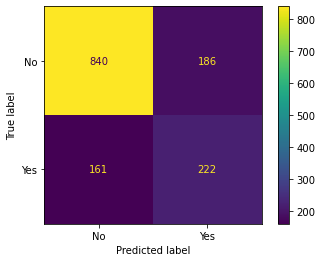

In [44]:
%%time

nn_clf_3 = MLPClassifier(hidden_layer_sizes = 10*(100,), learning_rate_init = 0.01, random_state = 0)
nn_clf_3.fit(X_train_OHE_df, y_train)
predictions_3 = nn_clf_3.predict(X_test_OHE_df)
accu3=accuracy_score(y_test, predictions_3)
cm_3 = confusion_matrix(y_test, predictions_3)
print(f"Accuracy: {accu3}")
disp_3 = ConfusionMatrixDisplay(confusion_matrix = cm_3, display_labels = nn_clf_3.classes_)
disp_3.plot();

# 2 hidden layers, 100 neurons, learning rate: 0.0001

Accuracy: 0.7899219304471257
Wall time: 11.6 s


C:\Users\Axl_w\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


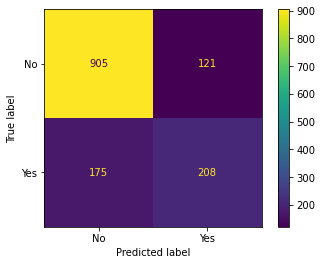

In [45]:
%%time

nn_clf_4 = MLPClassifier(hidden_layer_sizes = 2*(100,), learning_rate_init = 0.0001, random_state = 0)
nn_clf_4.fit(X_train_OHE_df, y_train)
predictions_4 = nn_clf_4.predict(X_test_OHE_df)
accu4=accuracy_score(y_test, predictions_4)
cm_4 = confusion_matrix(y_test, predictions_4)
print(f"Accuracy: {accu4}")
disp_4 = ConfusionMatrixDisplay(confusion_matrix = cm_4, display_labels = nn_clf_4.classes_)
disp_4.plot();

# 2 hidden layers, 100 neurons, learning rate: 0.00001

Accuracy: 0.8026969481902059
Wall time: 12 s


C:\Users\Axl_w\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


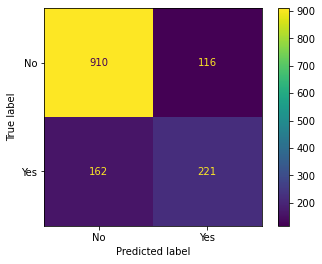

In [46]:
%%time

nn_clf_5 = MLPClassifier(hidden_layer_sizes = 2*(100,), learning_rate_init = 0.00001, random_state = 0)
nn_clf_5.fit(X_train_OHE_df, y_train)
predictions_5 = nn_clf_5.predict(X_test_OHE_df)
accu5 = accuracy_score(y_test, predictions_5)
cm_5 = confusion_matrix(y_test, predictions_5)
print(f"Accuracy: {accu5}")
disp_5 = ConfusionMatrixDisplay(confusion_matrix = cm_5, display_labels = nn_clf_5.classes_)
disp_5.plot();

By using different values for the amount of neurons, hidden layers aswell as learning rate it is clear that all of these parameters affect the runtime of the neural network.<br> The increase in the amount of time it takes to run the network increases by almost 4x the time when using 10 neurons instead of 4(2.5x increase in neurons). <br>The runtime increases by 3x when increasing the number of neurons from 5 to 100 (20x increase!).<br>
The learning rate also has a big impact on the runtime as it is increased to around 12s when set to both 0.0001 and 0.00001, the runtime is the same for these since convergence is not met before the maximum iterations is met. A lower learning rate leads to less changes made to the model based on the errors it has produced.<br>
Below both the networks that did not converge are run again with a higher max_iteration value to make sure that both the models do converge. It is shown that the higher learning rate(0.0001) in this case has a much longer runtime than the lower learning rate (0.00001). The reason for the lower learning rate having a shorter runtime could be that it finds a local minimum in the model relatively fast.

Accuracy: 0.7601135557132718
Wall time: 1min 8s


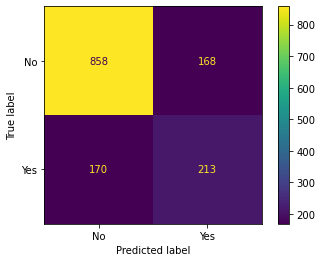

In [50]:
%%time

nn_clf_5 = MLPClassifier(hidden_layer_sizes = 2*(100,), learning_rate_init = 0.0001, random_state = 0, max_iter = 5000)
nn_clf_5.fit(X_train_OHE_df, y_train)
predictions_5 = nn_clf_5.predict(X_test_OHE_df)
accu5 = accuracy_score(y_test, predictions_5)
cm_5 = confusion_matrix(y_test, predictions_5)
print(f"Accuracy: {accu5}")
disp_5 = ConfusionMatrixDisplay(confusion_matrix = cm_5, display_labels = nn_clf_5.classes_)
disp_5.plot();

Accuracy: 0.801277501774308
Wall time: 13 s


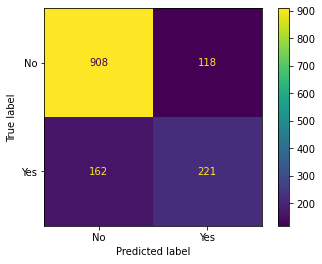

In [51]:
%%time

nn_clf_5 = MLPClassifier(hidden_layer_sizes = 2*(100,), learning_rate_init = 0.00001, random_state = 0, max_iter = 5000)
nn_clf_5.fit(X_train_OHE_df, y_train)
predictions_5 = nn_clf_5.predict(X_test_OHE_df)
accu5 = accuracy_score(y_test, predictions_5)
cm_5 = confusion_matrix(y_test, predictions_5)
print(f"Accuracy: {accu5}")
disp_5 = ConfusionMatrixDisplay(confusion_matrix = cm_5, display_labels = nn_clf_5.classes_)
disp_5.plot();

# Testing different batch sizes for the best setup.

Batch size: 32. Accuracy: 0.8026969481902059
Batch size: 64. Accuracy: 0.8026969481902059
Batch size: 128. Accuracy: 0.8005677785663591
Batch size: 200. Accuracy: 0.801277501774308
Batch size: 300. Accuracy: 0.8005677785663591
Batch size: 500. Accuracy: 0.7977288857345636
Wall time: 1min 37s


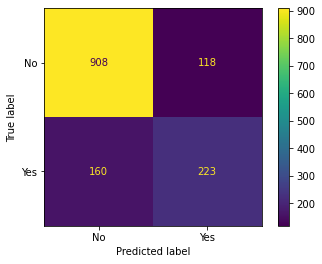

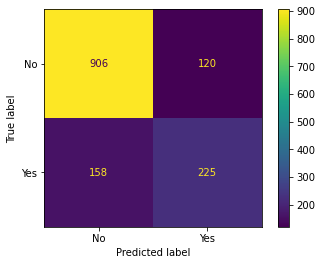

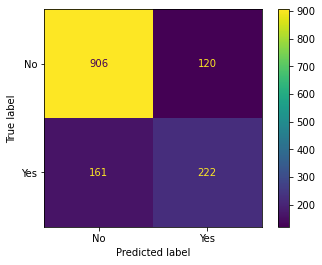

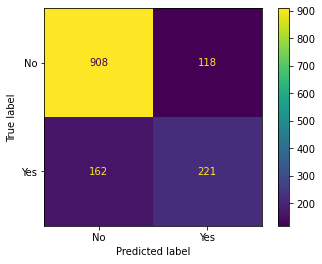

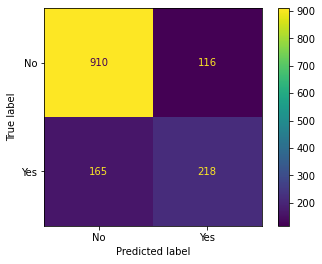

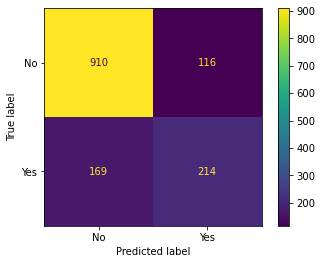

In [47]:
%%time

batches = [32,64,128,200,300,500]
for i in batches:
    nn_clf_b = MLPClassifier(hidden_layer_sizes = 2*(100,), learning_rate_init = 0.00001, random_state = 0, batch_size = i, max_iter = 2000)
    nn_clf_b.fit(X_train_OHE_df, y_train)
    predictions_b = nn_clf_b.predict(X_test_OHE_df)
    accub = accuracy_score(y_test, predictions_b)
    cm_b = confusion_matrix(y_test, predictions_b)
    print(f"Batch size: {i}. Accuracy: {accub}")
    disp_b = ConfusionMatrixDisplay(confusion_matrix = cm_b, display_labels = nn_clf_b.classes_)
    disp_b.plot();

# Best result:
Batch size: 32. Accuracy: 0.8026969481902059<br>
Med inställningar:<br>
2 gömda lager, 100 neuroner i varje lager, learning rate: 0.00001

# Looping through different setups to find a better result

In [84]:
%%time
hidden_layer_count = [2,3,4,5]
neuron_count = [5,10,20,50,100]
learning_rates = [0.01, 0.001, 0.0001]
activation_functions = ['relu', 'tanh', 'logistic', 'identity']


for layers in hidden_layer_count:
    for neurons in neuron_count:
        for learning in learning_rates:
            for func in activation_functions:
                layer_size = layers*(neurons,)
                nn_clf = MLPClassifier(hidden_layer_sizes = layer_size, learning_rate_init = learning, random_state = 0, activation = func, max_iter = 2000)
                nn_clf.fit(X_train_OHE_df, y_train)
                prediction = nn_clf.predict(X_test_OHE_df)
                accuracy = accuracy_score(y_test, prediction)
                if accuracy > 0.79:
                    print(f"Accuracy: {accuracy}.\nSettings:\nhidden_layer_count: {layers}\nneuron_count: {neurons}\nlearning rate: {learning}\nactivation function: {func}\n\n")

Accuracy: 0.7927608232789212.
Settings:
hidden_layer_count: 2
neuron_count: 5
learning rate: 0.01
activation function: logistic


Accuracy: 0.8055358410220014.
Settings:
hidden_layer_count: 2
neuron_count: 5
learning rate: 0.01
activation function: identity


Accuracy: 0.7984386089425124.
Settings:
hidden_layer_count: 2
neuron_count: 5
learning rate: 0.001
activation function: relu


Accuracy: 0.7963094393186657.
Settings:
hidden_layer_count: 2
neuron_count: 5
learning rate: 0.001
activation function: tanh


Accuracy: 0.8062455642299503.
Settings:
hidden_layer_count: 2
neuron_count: 5
learning rate: 0.001
activation function: logistic


Accuracy: 0.801277501774308.
Settings:
hidden_layer_count: 2
neuron_count: 5
learning rate: 0.001
activation function: identity


Accuracy: 0.7991483321504613.
Settings:
hidden_layer_count: 2
neuron_count: 5
learning rate: 0.0001
activation function: relu


Accuracy: 0.7977288857345636.
Settings:
hidden_layer_count: 2
neuron_count: 5
learning rate: 0.00

## Different batch sizes for the best result:

Batch size: 32. Accuracy: 0.7991483321504613
Batch size: 64. Accuracy: 0.8069552874378992
Batch size: 128. Accuracy: 0.8055358410220014
Batch size: 200. Accuracy: 0.8069552874378992
Batch size: 300. Accuracy: 0.8048261178140526
Batch size: 500. Accuracy: 0.7970191625266146


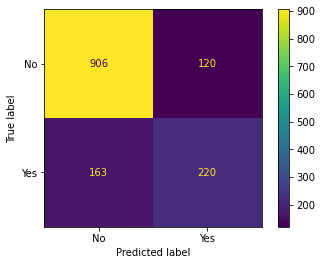

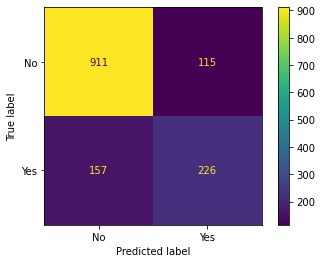

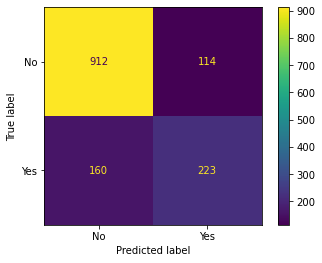

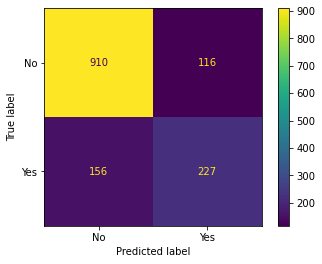

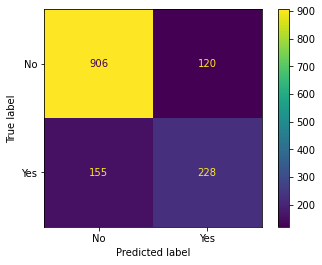

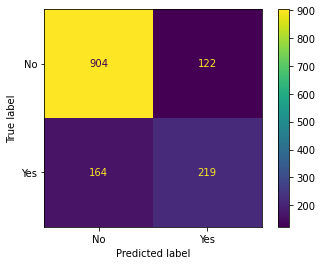

In [87]:
   
batches = [32,64,128,200,300,500]
for i in batches:
    nn_clf_b = MLPClassifier(hidden_layer_sizes = 5*(5,), learning_rate_init = 0.001, random_state = 0, batch_size = i, max_iter = 2000, activation= 'logistic')
    nn_clf_b.fit(X_train_OHE_df, y_train)
    predictions_b = nn_clf_b.predict(X_test_OHE_df)
    accub = accuracy_score(y_test, predictions_b)
    cm_b = confusion_matrix(y_test, predictions_b)
    print(f"Batch size: {i}. Accuracy: {accub}")
    disp_b = ConfusionMatrixDisplay(confusion_matrix = cm_b, display_labels = nn_clf_b.classes_)
    disp_b.plot();

# The best result found through standardization of the data is: 0.806955287437899

# Scaling the data through normalization

Normalizaiton of (TotalChares, MonthlyCharges, tenure) leads to a result with accuracy > 0.8 in the first setup.

But from what i've read, normalization should not be used over standardization of data if the data is not normally distributed which the attributes are not. Based on that, the model presented above is probably a more suitable way of handling this dataset.

The model based on standardization is slightly better at predicting churn of users (correctly predicted: 227) vs the normalized model (correctly predicted: 206). The normalized model is better at predicting non-churn (correctly predicted: 930) vs standardization (correctly predicted: 910)


# Scaling the numerical data then adding it back to the OHE frame


In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
norm_scaler = MinMaxScaler()

## Reshaping and adding TotalCharges

In [54]:
X_train_tot_charges_reshape_norm = X_train['TotalCharges'].values.reshape(-1,1)
X_test_tot_charge_reshape_norm = X_test['TotalCharges'].values.reshape(-1,1)


In [55]:
#Reshaping data so that it can be transformed
tot_charges_scaler_norm = norm_scaler.fit(X_train_tot_charges_reshape_norm)
X_train_tot_charges_scaled_norm = tot_charges_scaler_norm.transform(X_train_tot_charges_reshape_norm)
X_test_tot_charge_scaled_norm = tot_charges_scaler_norm.transform(X_test_tot_charge_reshape_norm)
#The data needs to be assigned to 1 column for it to be added to the dataframe
X_train_tot_charges_scaled_norm = X_train_tot_charges_scaled_norm[:,0]
X_test_tot_charge_scaled_norm = X_test_tot_charge_scaled_norm[:,0]

X_train_OHE_norm['TotalCharges'] = pd.Series(X_train_tot_charges_scaled_norm)
X_test_OHE_norm['TotalCharges'] = pd.Series(X_test_tot_charge_scaled_norm)
X_train_OHE_norm

,x0_Female,x0_Male,x1_0,x1_1,x2_No,x2_Yes,x3_No,x3_Yes,x4_No,x4_Yes,...,x13_Month-to-month,x13_One year,x13_Two year,x14_No,x14_Yes,x15_Bank transfer (automatic),x15_Credit card (automatic),x15_Electronic check,x15_Mailed check,TotalCharges
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.003016
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.011116
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.797497
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.012123
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.503103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.491031
5630,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.018726
5631,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.106853
5632,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.270119


### Reshaping and adding MonthlyCharges

In [56]:
X_train_monthly_charges_reshape_norm = X_train['MonthlyCharges'].values.reshape(-1,1)
X_test_monthly_charge_reshape_norm = X_test['MonthlyCharges'].array.reshape(-1,1)

In [57]:
#Reshaping data so that it can be transformed
monthly_charges_scaler_norm = norm_scaler.fit(X_train_monthly_charges_reshape_norm)

X_train_monthly_charges_scaled_norm = monthly_charges_scaler_norm.transform(X_train_monthly_charges_reshape_norm)
X_test_monthly_charge_scaled_norm = monthly_charges_scaler_norm.transform(X_test_monthly_charge_reshape_norm)

#The data needs to be assigned to 1 column for it to be added to the dataframe
X_train_monthly_charges_scaled_norm = X_train_monthly_charges_scaled_norm[:,0]
X_test_monthly_charge_scaled_norm = X_test_monthly_charge_scaled_norm[:,0]

X_train_OHE_norm['MonthlyCharges'] = pd.Series(X_train_monthly_charges_scaled_norm)
X_test_OHE_norm['MonthlyCharges'] = pd.Series(X_test_monthly_charge_scaled)


X_train_OHE_norm

,x0_Female,x0_Male,x1_0,x1_1,x2_No,x2_Yes,x3_No,x3_Yes,x4_No,x4_Yes,...,x13_One year,x13_Two year,x14_No,x14_Yes,x15_Bank transfer (automatic),x15_Credit card (automatic),x15_Electronic check,x15_Mailed check,TotalCharges,MonthlyCharges
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.003016,0.069154
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.011116,0.017910
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.797497,0.973134
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.012123,0.022388
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.503103,0.763682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.491031,0.415423
5630,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.018726,0.025871
5631,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.106853,0.016915
5632,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.270119,0.462687


## Reshaping and adding tenure

In [58]:
X_train_tenure_reshape_norm = X_train['tenure'].values.reshape(-1,1)
X_test_tenure_reshape_norm = X_test['tenure'].values.reshape(-1,1)

In [59]:
#Reshaping data so that it can be transformed
tenure_scaler_norm = norm_scaler.fit(X_train_tenure_reshape_norm)
X_train_tenure_scaled_norm = tenure_scaler_norm.transform(X_train_tenure_reshape_norm)
X_test_tenure_scaled_norm = tenure_scaler_norm.transform(X_test_tenure_reshape_norm)

#The data needs to be assigned to 1 column for it to be added to the dataframe
X_train_tenure_scaled_norm = X_train_tenure_scaled_norm[:,0]
X_test_tenure_scaled_norm = X_test_tenure_scaled_norm[:,0]

X_train_OHE_norm['tenure'] = pd.Series(X_train_tenure_scaled_norm)
X_test_OHE_norm['tenure'] = pd.Series(X_test_tenure_scaled_norm)
X_train_OHE_norm

,x0_Female,x0_Male,x1_0,x1_1,x2_No,x2_Yes,x3_No,x3_Yes,x4_No,x4_Yes,...,x13_Two year,x14_No,x14_Yes,x15_Bank transfer (automatic),x15_Credit card (automatic),x15_Electronic check,x15_Mailed check,TotalCharges,MonthlyCharges,tenure
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.003016,0.069154,0.013889
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.011116,0.017910,0.069444
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.797497,0.973134,0.833333
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.012123,0.022388,0.069444
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.503103,0.763682,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.491031,0.415423,1.000000
5630,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.018726,0.025871,0.111111
5631,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.106853,0.016915,0.638889
5632,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.270119,0.462687,0.513889


# Final transformed dataset:

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [60]:
X_train_OHE_norm

,x0_Female,x0_Male,x1_0,x1_1,x2_No,x2_Yes,x3_No,x3_Yes,x4_No,x4_Yes,...,x13_Two year,x14_No,x14_Yes,x15_Bank transfer (automatic),x15_Credit card (automatic),x15_Electronic check,x15_Mailed check,TotalCharges,MonthlyCharges,tenure
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.003016,0.069154,0.013889
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.011116,0.017910,0.069444
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.797497,0.973134,0.833333
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.012123,0.022388,0.069444
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.503103,0.763682,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.491031,0.415423,1.000000
5630,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.018726,0.025871,0.111111
5631,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.106853,0.016915,0.638889
5632,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.270119,0.462687,0.513889


# 4 hidden layers, 5 neurons, learning rate: 0.01

Accuracy: 0.801277501774308
Wall time: 1.97 s


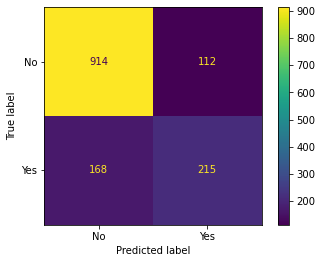

In [61]:
%%time

nn_clf_1 = MLPClassifier(hidden_layer_sizes = (5,5,5,5), learning_rate_init = 0.01, random_state = 0)
nn_clf_1.fit(X_train_OHE_norm, y_train)
predictions_1 = nn_clf_1.predict(X_test_OHE_norm)
acc1_norm = accuracy_score(y_test, predictions_1)
print(f"Accuracy: {acc1_norm}")
cm_1 = confusion_matrix(y_test, predictions_1)
disp_1 = ConfusionMatrixDisplay(confusion_matrix = cm_1, display_labels = nn_clf_1.classes_)
disp_1.plot();

# 2 hidden layers, 100 neurons, learning rate: 0.01

Accuracy: 0.7437899219304471
Wall time: 5.63 s


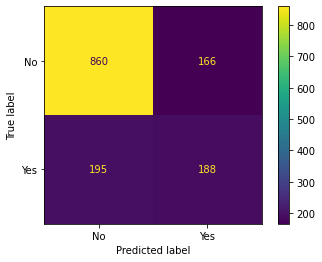

In [62]:
%%time

nn_clf_2 = MLPClassifier(hidden_layer_sizes = (100,100), learning_rate_init = 0.01, random_state = 0)
nn_clf_2.fit(X_train_OHE_norm, y_train)
predictions_2 = nn_clf_2.predict(X_test_OHE_norm)
acc2_norm = accuracy_score(y_test, predictions_2)
print(f"Accuracy: {acc2_norm}")
cm_2 = confusion_matrix(y_test, predictions_2)
disp_2 = ConfusionMatrixDisplay(confusion_matrix = cm_2, display_labels = nn_clf_2.classes_)
disp_2.plot();

# 10 hidden layers, 100 neurons, learning rate: 0.01

Accuracy: 0.7501774308019872
Wall time: 28.1 s


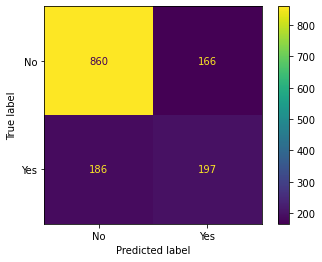

In [63]:
%%time

nn_clf_3 = MLPClassifier(hidden_layer_sizes = (100,100,100,100,100,100,100,100,100,100), learning_rate_init = 0.01, random_state = 0)
nn_clf_3.fit(X_train_OHE_norm,y_train)
prediction_3 = nn_clf_3.predict(X_test_OHE_norm)
acc3_norm = accuracy_score(y_test,prediction_3)
print(f"Accuracy: {acc3_norm}")
cm_3 = confusion_matrix(y_test, prediction_3)
disp_3 = ConfusionMatrixDisplay(confusion_matrix = cm_3, display_labels = nn_clf_3.classes_)
disp_3.plot();

# 2 hidden layers, 100 neurons, learning rate: 0.0001

Accuracy: 0.7821149751596878
Wall time: 13.3 s


C:\Users\Axl_w\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


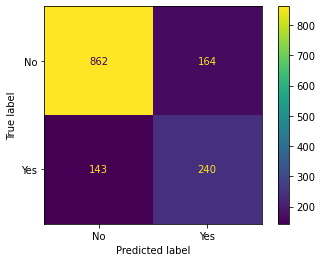

In [64]:
%%time

nn_clf_4 = MLPClassifier(hidden_layer_sizes = (100,100), learning_rate_init = 0.0001, random_state = 0)
nn_clf_4.fit(X_train_OHE_norm,y_train)
prediction_4 = nn_clf_4.predict(X_test_OHE_norm)
acc4_norm = accuracy_score(y_test, prediction_4)
print(f"Accuracy: {acc4_norm}")
cm_4 = confusion_matrix(y_test,prediction_4)
disp_4 = ConfusionMatrixDisplay(confusion_matrix = cm_4, display_labels = nn_clf_4.classes_)
disp_4.plot();

# 2 hidden layers, 100 neurons, learning rate: 0.00001

Accuracy: 0.7920511000709723
Wall time: 14 s


C:\Users\Axl_w\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


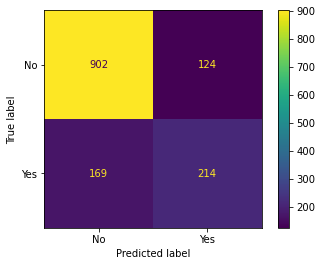

In [65]:
%%time

nn_clf_5 = MLPClassifier(hidden_layer_sizes = (100,100), learning_rate_init = 0.00001, random_state = 0)
nn_clf_5.fit(X_train_OHE_norm, y_train)
prediction_5 = nn_clf_5.predict(X_test_OHE_norm)
acc5_norm = accuracy_score(y_test,prediction_5)
print(f"Accuracy: {acc5_norm}")
cm_5 = confusion_matrix(y_test, prediction_5)
disp_5 = ConfusionMatrixDisplay(confusion_matrix = cm_5, display_labels = nn_clf_5.classes_)
disp_5.plot();

# Testing different batch sizes for the best prediction.


Batch size: 32. Accuracy: 0.8048261178140526
Batch size: 64. Accuracy: 0.7828246983676366
Batch size: 128. Accuracy: 0.8019872249822569
Batch size: 200. Accuracy: 0.801277501774308
Batch size: 300. Accuracy: 0.78708303761533
Batch size: 500. Accuracy: 0.7970191625266146


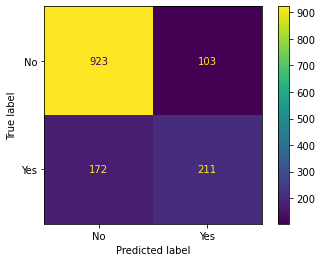

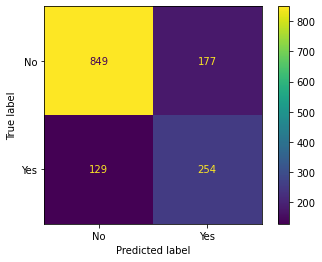

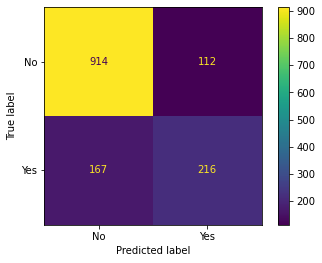

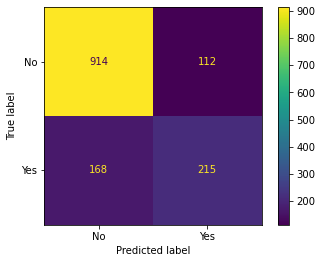

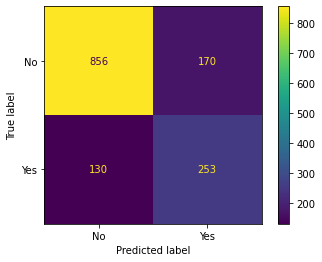

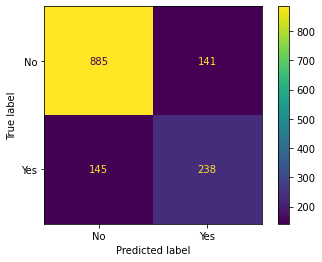

In [82]:
batches = [32,64,128,200,300,500]
for i in batches:
    nn_clf_1 = MLPClassifier(hidden_layer_sizes = 4*(5,), learning_rate_init = 0.01, random_state = 0, batch_size = i)
    nn_clf_1.fit(X_train_OHE_norm, y_train)
    predictions_1 = nn_clf_1.predict(X_test_OHE_norm)
    acc1_norm = accuracy_score(y_test, predictions_1)
    print(f"Batch size: {i}. Accuracy: {acc1_norm}")
    cm_1 = confusion_matrix(y_test, predictions_1)
    disp_1 = ConfusionMatrixDisplay(confusion_matrix = cm_1, display_labels = nn_clf_1.classes_)
    disp_1.plot();

#  Looping through multiple setups to find a better result

In [83]:
import time

In [261]:
%%time
hidden_layer_count = [2,3,4,5]
neuron_count = [5,10,20,50,100]
learning_rates = [0.01, 0.001, 0.0001]
activation_functions = ['relu', 'tanh', 'logistic', 'identity']


for layers in hidden_layer_count:
    for neurons in neuron_count:
        for learning in learning_rates:
            for func in activation_functions:
                layer_size = layers*(neurons,)
                nn_clf = MLPClassifier(hidden_layer_sizes = layer_size, learning_rate_init = learning, random_state = 0, activation = func, max_iter = 2000)
                nn_clf.fit(X_train_OHE_norm, y_train)
                prediction = nn_clf.predict(X_test_OHE_norm)
                accuracy = accuracy_score(y_test, prediction)
                if accuracy > 0.79:
                    print(f"Accuracy: {accuracy}.\nSettings:\nhidden_layer_count: {layers}\nneuron_count: {neurons}\nlearning rate: {learning}\nactivation function: {func}\n\n")

Accuracy: 0.7963094393186657.
Settings:
hidden_layer_count: 2
neuron_count: 5
learning rate: 0.01
activation function: logistic


Accuracy: 0.8055358410220014.
Settings:
hidden_layer_count: 2
neuron_count: 5
learning rate: 0.01
activation function: identity


Accuracy: 0.7977288857345636.
Settings:
hidden_layer_count: 2
neuron_count: 5
learning rate: 0.001
activation function: relu


Accuracy: 0.7927608232789212.
Settings:
hidden_layer_count: 2
neuron_count: 5
learning rate: 0.001
activation function: tanh


Accuracy: 0.7955997161107168.
Settings:
hidden_layer_count: 2
neuron_count: 5
learning rate: 0.001
activation function: logistic


Accuracy: 0.7998580553584103.
Settings:
hidden_layer_count: 2
neuron_count: 5
learning rate: 0.001
activation function: identity


Accuracy: 0.794889992902768.
Settings:
hidden_layer_count: 2
neuron_count: 5
learning rate: 0.0001
activation function: relu


Accuracy: 0.794889992902768.
Settings:
hidden_layer_count: 2
neuron_count: 5
learning rate: 0.000

Batch size: 32. Accuracy: 0.7835344215755855
Batch size: 64. Accuracy: 0.7984386089425124
Batch size: 128. Accuracy: 0.8041163946061036
Batch size: 200. Accuracy: 0.8055358410220014
Batch size: 300. Accuracy: 0.8062455642299503
Batch size: 500. Accuracy: 0.7998580553584103


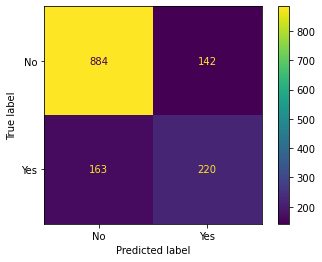

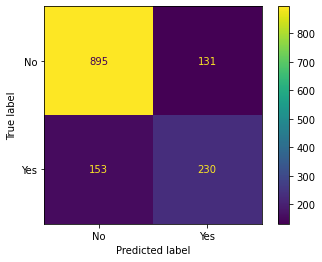

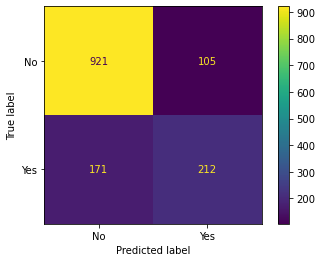

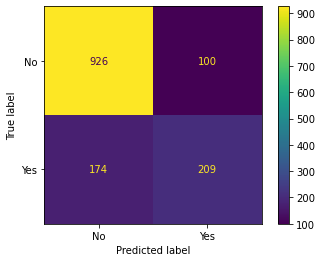

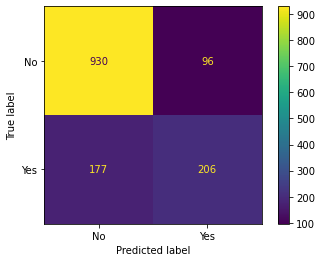

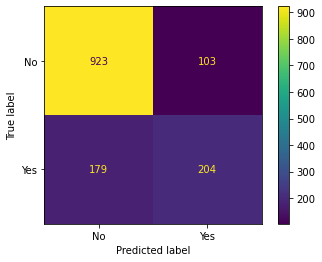

In [89]:
  
batches = [32,64,128,200,300,500]
for i in batches:
    nn_clf_1 = MLPClassifier(hidden_layer_sizes = 5*(10,), learning_rate_init = 0.001, random_state = 0, batch_size = i, activation = 'logistic', max_iter = 2000)
    nn_clf_1.fit(X_train_OHE_norm, y_train)
    predictions_1 = nn_clf_1.predict(X_test_OHE_norm)
    acc1_norm = accuracy_score(y_test, predictions_1)
    print(f"Batch size: {i}. Accuracy: {acc1_norm}")
    cm_1 = confusion_matrix(y_test, predictions_1)
    disp_1 = ConfusionMatrixDisplay(confusion_matrix = cm_1, display_labels = nn_clf_1.classes_)
    disp_1.plot();

The best result found is: 0.8062455642299503

with the setup:
 
Accuracy: 0.8055358410220014. <br>
Settings:<br>
hidden_layer_count: 5<br>
neuron_count: 10<br>
learning rate: 0.001<br>
activation function: logistic<br>
batch size : 300<br>